#### Loading libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

### Building Linear Regression Class

In [2]:
class LinearRegression:
    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weight = None
        self.bias = None
       
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weight) + self.bias
            
            #gradients
            dw = (1/n_samples) * (2 * np.dot(X.T, (y_predicted - y)))
            db = (1/n_samples) * (2 * sum(y_predicted - y))
            
            # weight adjustment
            self.weight -= self.lr * dw
            self.bias -= self.lr * db
              
    def predict(self, x):
        y_approximated = np.dot(x, self.weight) + self.bias
        return y_approximated

### Testing the Linear Model Algorithm

In [3]:
X, y = datasets.make_regression(n_samples=500,
                                n_features=1,
                                noise=20,
                                random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=44)

regressor = LinearRegression(lr = 0.01, n_iters=1000)
regressor.fit(X_train, y_train)


def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

predictions = regressor.predict(X_test)
accu = r2_score(y_test, predictions)
print("r2:", accu)

y_pred_line = regressor.predict(X)

r2: 0.9183195515079544


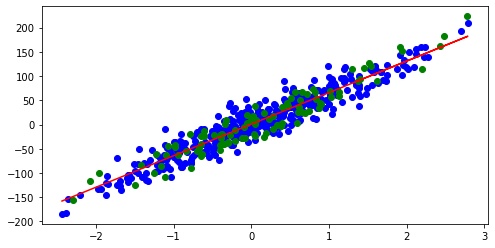

In [4]:
fig, ax = plt.subplots(figsize = (8, 4))
ax.scatter(X_train, y_train, color = "blue")
ax.scatter(X_test, y_test, color = "green")
ax.plot(X, y_pred_line, color = "red")